# Apêndice A.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

## Importações.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

tf.test.gpu_device_name()

flag = 1 #treinar modelo
flag = 0 #carregar modelo !! (Comente para treinar e salvar)

2021-09-01 22:04:24.267884: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-01 22:04:24.267906: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-01 22:04:25.308756: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-01 22:04:25.309483: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-01 22:04:25.309642: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so

## Configurações.

In [4]:
input_shape = (70,50,3)
batch = 32

## Importação do Dataset.

In [5]:
BASE_PATH = ['../..','datasets']
DATASET_DIR=['dataset2','PKLotSegmented','UFPR04','todos']

DATASET_DIR = os.path.join(BASE_PATH[0],BASE_PATH[1],
                           DATASET_DIR[0],DATASET_DIR[1],DATASET_DIR[2],DATASET_DIR[3])


X = tf.keras.preprocessing.image_dataset_from_directory(DATASET_DIR, image_size=input_shape[:2], batch_size=batch, label_mode='binary',
                                                        seed=1, color_mode='rgb', validation_split=0.3, subset = 'training')


X_val = tf.keras.preprocessing.image_dataset_from_directory(DATASET_DIR, image_size=input_shape[:2], batch_size=batch, label_mode='binary',
                                                        seed=1, color_mode='rgb', validation_split=0.3, subset = 'validation')


print('\nClasses: {} em {}'.format(X.class_names,DATASET_DIR))

Found 105843 files belonging to 2 classes.
Using 74091 files for training.


2021-09-01 22:04:39.829016: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-01 22:04:39.831272: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Found 105843 files belonging to 2 classes.
Using 31752 files for validation.

Classes: ['Empty', 'Occupied'] em ../../datasets/dataset2/PKLotSegmented/UFPR04/todos


In [6]:
%%time
f=0
for j in X_val.file_paths:
    for i in X.file_paths:
        i == j
        if(i == j):
            f=1
            print(i)
if not f:        
    print('Nenhum elemento em comum as duas listas foram encontrados')
    
    

Nenhum elemento em comum as duas listas foram encontrados
CPU times: user 7min 26s, sys: 0 ns, total: 7min 26s
Wall time: 7min 26s


## Construindo o modelo e compilando.

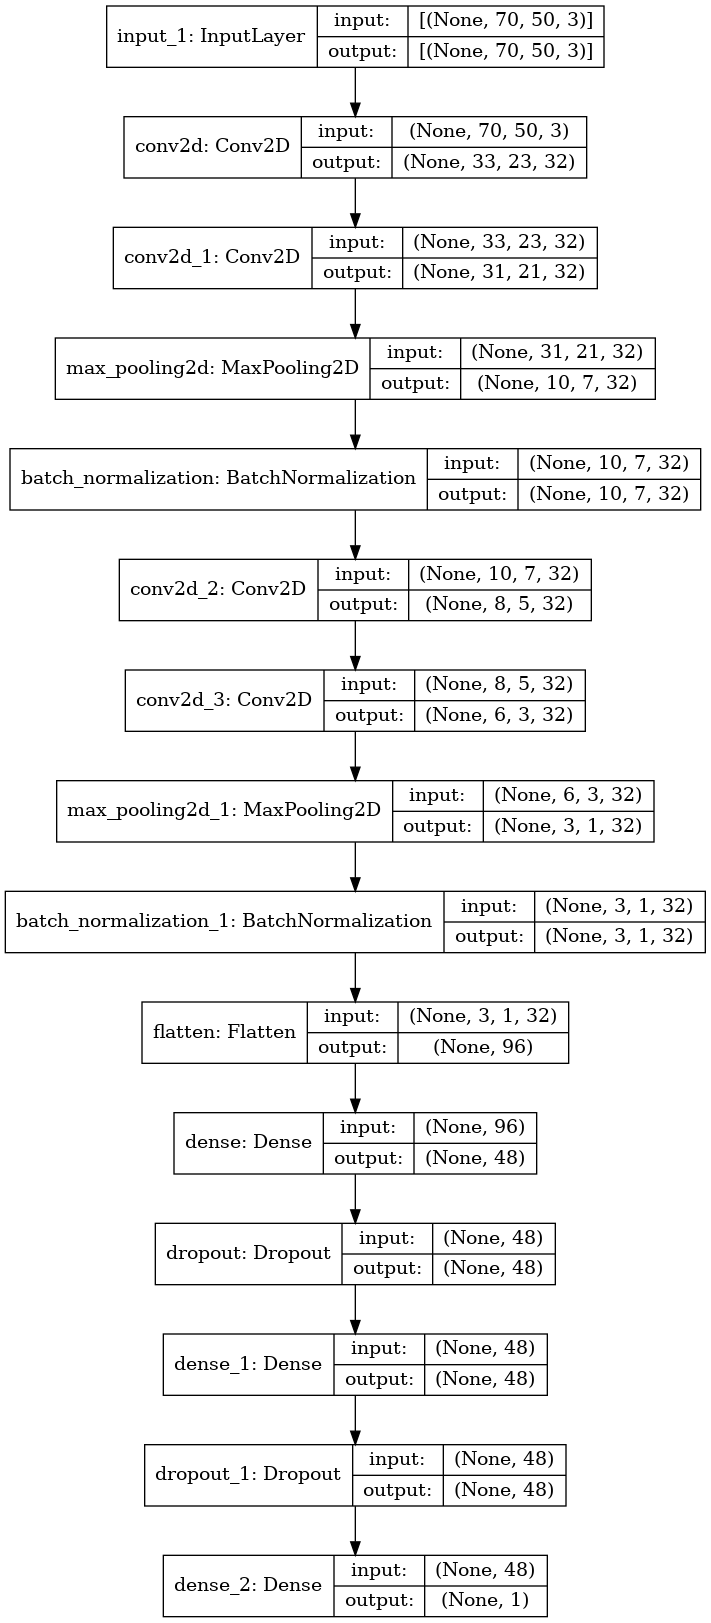

In [5]:
input_shape = (70,50,3)
def modelo():
    model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(filters=32,kernel_size=5,strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=3),
        layers.BatchNormalization(),
        
        layers.Conv2D(32,3, activation="relu"),
        layers.Conv2D(32,3, activation="relu"),
        layers.MaxPooling2D(2),
        layers.BatchNormalization(),
        
        layers.Flatten(),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ]
)

    return model

model = modelo()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.summary()
keras.utils.plot_model(model, "arquitetura.png", show_shapes=True)

## Testando os Labels carregadas da base de treinamento.

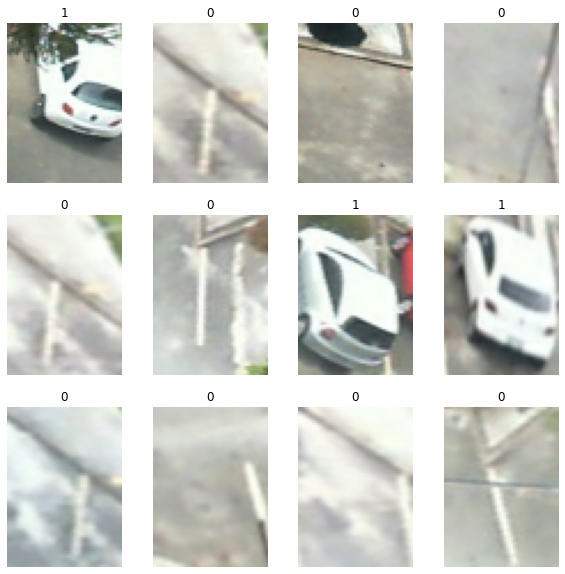

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in X.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Exemplo de Imagem não segmentada.

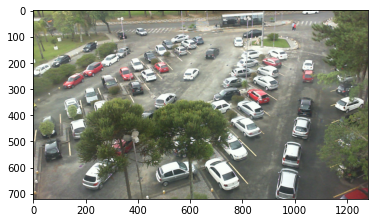

In [16]:
img_full = os.path.join(BASE_PATH[0],BASE_PATH[1],
                        'PKLot','UFPR04','Sunny','todas','2012-12-07_17_12_25.jpg')

img_full = plt.imread(img_full)
plt.imshow(img_full)

## Treinando o modelo.

In [8]:
%%time

if flag:
    model.fit(X, epochs=9)
else:
    LOAD_DIR = os.path.split(DATASET_DIR)[0] # Separa (head,tail) -> Indice [0] = head
    LOAD_DIR = os.path.join(LOAD_DIR,'model1')

    model = keras.models.load_model(LOAD_DIR)
    

CPU times: user 695 ms, sys: 19.7 ms, total: 715 ms
Wall time: 714 ms


## Validação do modelo treinado. (testando na base de dados de validação)

In [17]:
score = model.evaluate(X_val, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

993/993 - 15s - loss: 0.0236 - accuracy: 0.9944
Test loss: 0.023562612012028694
Test accuracy: 0.9943625330924988


## Salvando o modelo treinado.

In [10]:
if flag:
    SAVE_DIR = os.path.split(DATASET_DIR)[0] # Separa (head,tail) -> Indice [0] = head
    SAVE_DIR = os.path.join(SAVE_DIR,'model1')
    model.save(
        SAVE_DIR,
        overwrite=False,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )

## Validação individual (random) na base de treinamento

Vaga livre: 100.00 porcento.
Vaga ocupada 0.00 porcento.


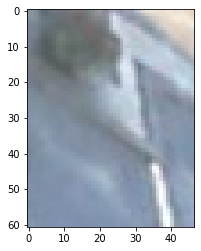

In [25]:
path = X.file_paths[np.random.randint(len(X.file_paths))]
img = keras.preprocessing.image.load_img(path, target_size=input_shape[:2])
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,  0)

predictions = model.predict(img_array)
score = predictions[0]

print(
    'Vaga livre: %.2f porcento.\nVaga ocupada %.2f porcento.'
    % (100 * (1 - score), 100 * score)
)

plot = plt.imread(path)
plt.imshow(plot)


## Validação individual (random) no Banco de testes

Vaga livre: 100.00 porcento.
Vaga ocupada 0.00 porcento.


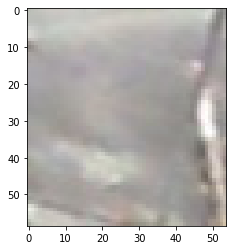

In [30]:
path = X_val.file_paths[np.random.randint(len(X_val.file_paths))]
img = keras.preprocessing.image.load_img(path, target_size=input_shape[:2])
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,  0)

predictions = model.predict(img_array)
score = predictions[0]

print(
    'Vaga livre: %.2f porcento.\nVaga ocupada %.2f porcento.'
    % (100 * (1 - score), 100 * score)
)

plot = plt.imread(path)
plt.imshow(plot)


## Debug 

In [18]:
X.file_paths

['../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Occupied/2012-12-07_17_47_26#017.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Empty/2013-01-20_15_40_11#018.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Occupied/2012-12-19_16_10_12#007.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Occupied/2012-12-11_20_31_13#015.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Empty/2013-01-16_18_35_15#009.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Occupied/2012-12-18_16_35_13#013.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Occupied/2012-12-20_16_10_11#010.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Empty/2012-12-25_18_25_14#011.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Empty/2013-01-16_10_05_05#020.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Occupied/2013-01-18_13_40_09#022.jpg',
 '../../datasets/dataset2/PKLotSegmented/UFPR04/todos/Empty/2013-01-19_16_15_12#01